In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('bikes_rent.csv', header = 0, sep = ',')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


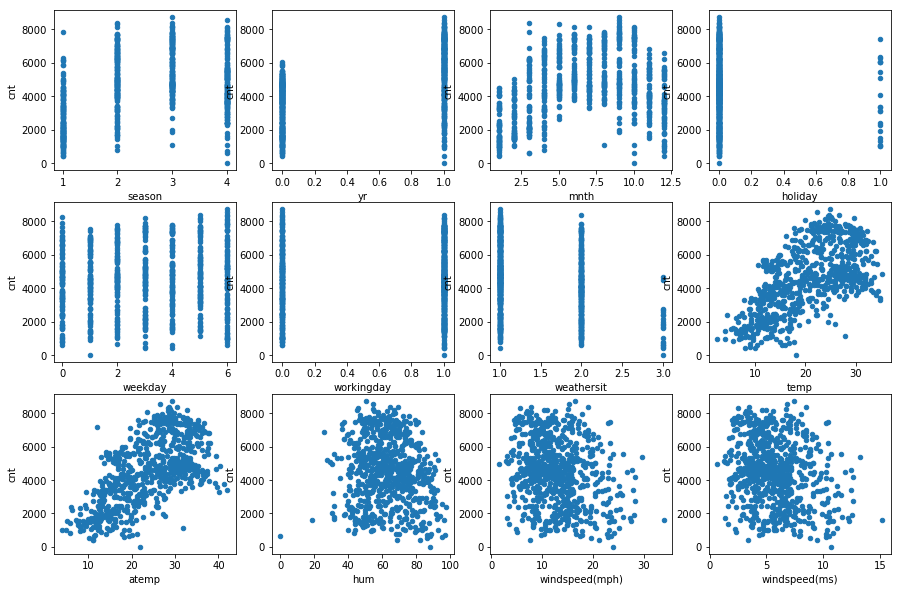

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [7]:
corrw = df.loc[:,df.columns[:-1]].corrwith(df.loc[:,'cnt'])
corr = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr(method='pearson')
corr

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [8]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [9]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [10]:
df_shuffled = shuffle(df, random_state=1)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)
[print(x, ": ", y) for x, y in zip(df.columns, regr.coef_)] 

season :  570.869441238
yr :  1021.96744721
mnth :  -141.30524923
holiday :  -86.7599633437
weekday :  137.226261157
workingday :  56.3946412646
weathersit :  -330.228329803
temp :  367.463772694
atemp :  585.567180625
hum :  -145.61118932
windspeed(mph) :  1.24597615228e+13
windspeed(ms) :  -1.2459761523e+13


[None, None, None, None, None, None, None, None, None, None, None, None]

In [12]:
from sklearn.linear_model import Lasso, Ridge
regr_lasso = Lasso()
regr_lasso.fit(X, y)
[print(x, ": ", y) for x, y in zip(df.columns, regr_lasso.coef_)] 

season :  560.241616031
yr :  1019.46349407
mnth :  -128.730627037
holiday :  -86.1527813337
weekday :  137.347893905
workingday :  55.2123706414
weathersit :  -332.369856962
temp :  376.36323621
atemp :  576.530793505
hum :  -144.129155003
windspeed(mph) :  -197.139689402
windspeed(ms) :  -2.8050680227e-08


[None, None, None, None, None, None, None, None, None, None, None, None]

In [13]:
regr_lasso = Ridge()
regr_lasso.fit(X, y)
print(list(zip(df.columns, regr_lasso.coef_)))

[('season', 563.06457225201427), ('yr', 1018.9483787875284), ('mnth', -131.87332028247403), ('holiday', -86.74609799709242), ('weekday', 138.00511117871898), ('workingday', 55.903110375064593), ('weathersit', -332.34978849907338), ('temp', 386.45788919195593), ('atemp', 566.34704706001958), ('hum', -145.07132729867206), ('windspeed(mph)', -99.259441081845949), ('windspeed(ms)', -99.25944115428787)]


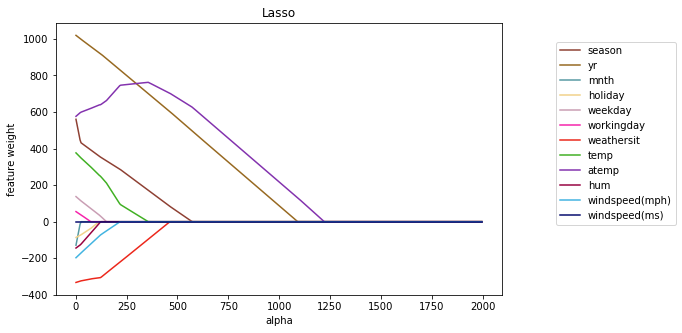

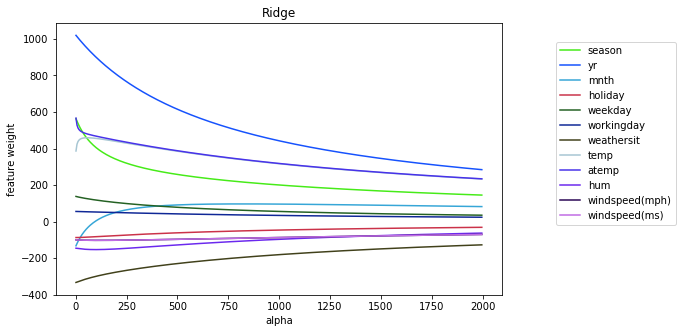

In [14]:
alphas = np.arange(1, 2000, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for i in range(0, len(alphas)):
    coefs_lasso[i:i+1] = Lasso(alphas[i]).fit(X, y).coef_    
for i in range(0, len(alphas)):
    coefs_ridge[i:i+1] = Ridge(alphas[i]).fit(X, y).coef_

#print("Coefficient matrix for Lasso\n")    
#print(coefs_lasso)
#print("\nCoefficient matrix for Ridge\n")
#print(coefs_ridge)

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [15]:
from sklearn.linear_model import LassoCV

[  1  51 101 151 201 251 301 351 401 451 501 551 601 651 701 751 801 851
 901 951]


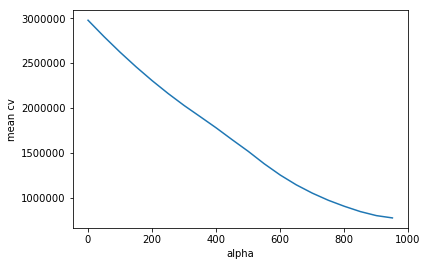

[[ 3320999.08595888  2915577.812879    2694323.68380492]
 [ 3101514.39484143  2731039.951832    2549423.08857664]
 [ 2894034.77259604  2556225.45769563  2412323.18579563]
 [ 2698560.20628793  2391134.95937182  2283023.9525482 ]
 [ 2515090.70388085  2235771.6743176   2161525.38883435]
 [ 2343626.26377376  2090134.53447538  2047827.49465408]
 [ 2184166.88320269  1954221.32938328  1941930.27000739]
 [ 2036712.56510408  1828031.57649355  1843833.71491615]
 [ 1898522.80905983  1695236.42563745  1739223.85985678]
 [ 1744340.97659425  1561531.67380545  1630520.95300895]
 [ 1592146.13575768  1440468.14371469  1516836.18454758]
 [ 1436481.70904378  1298604.95714102  1397451.99749818]
 [ 1298873.88680557  1165329.06887536  1291701.53224093]
 [ 1179322.5374675   1050225.52912471  1199585.94538904]
 [ 1077827.75465657   952841.3115161   1121105.09842883]
 [  994389.43775925   867582.11047065  1051395.29595741]
 [  916919.94595778   800373.89104584   994781.88440982]
 [  849565.66640302   741995.81

In [125]:
# taking mean of each alpha result by cross validation results
alphas_ = np.arange(1, 1000, 50)
print(alphas_)
lasso_regr = LassoCV(alphas = alphas_, n_alphas=len(alphas_))
lasso_regr.fit(X, y)
plt.plot(alphas_, lasso_regr.mse_path_.mean(axis=1))
plt.xlabel("alpha")
plt.ylabel("mean cv")
plt.show()
print(lasso_regr.mse_path_)